# Klein Model and Einstein Midpoints

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections, lines, markers, path, patches
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

## 1-D Hyperboloid

In [2]:
alpha = np.linspace(-0.323*np.pi, 0.323*np.pi, 1000)
x0 = np.sinh(alpha)
x1 = np.cosh(alpha)
x = np.array([np.array([x0i, x1i]) for x0i, x1i in zip(x0, x1)])
#print(x)

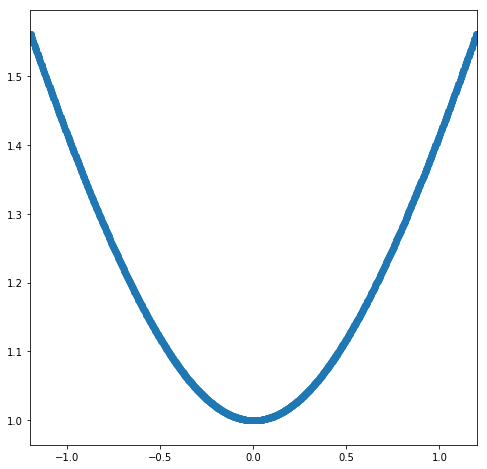

In [3]:
fig = plt.figure(figsize=(8,8))
ax = plt.gca(xlim=[-1.2, 1.2])
plt.scatter(x0, x1)

## Klein Model
$$K = \{(x_1,...,x_n, 1):x_1^2+...+x_n^2 < 1\}$$
Project from hyperboloid to Klein model: $$ \pi_{\mathbb{H}\to\mathbb{K}}(x)_i = \frac{x_i}{x_{n+1}}$$

In [4]:
def project_to_klein(v):
    '''
        Project hyperboloid points to Beltrami-Klein ball
        Input:
            v, a vector in ambient space coordinates, with nth dimension 'time-like'
        Output:
            a vector in Beltrami-Klein coordinates
    '''
    return v/v[:,-1].reshape([-1,1])

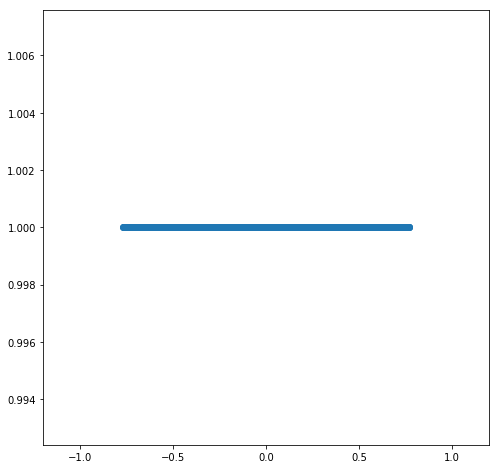

In [5]:
klein_pts = project_to_klein(x)
fig = plt.figure(figsize=(8,8))
ax = plt.gca(xlim=[-1.2, 1.2])
plt.scatter(klein_pts[:,0], klein_pts[:,1])

## 2-D Hyperboloid

In [6]:
alpha = np.linspace(-1., 1., 100)
theta = np.linspace(-np.pi, np.pi, 100)

alpha_mesh, theta_mesh = np.meshgrid(alpha, theta)

x0 = np.sinh(alpha_mesh)*np.cos(theta_mesh)
x1 = np.sinh(alpha_mesh)*np.sin(theta_mesh)
x2 = np.cosh(alpha_mesh)
print("Ranges: {:.3g} < x0 < {:.3g}, {:.3g} < x1 < {:.3g}, {:.3g} < x2 < {:.3g}".format(
            np.min(x0), np.max(x0),np.min(x1), np.max(x1),np.min(x2), np.max(x2),
        )
     )

Ranges: -1.18 < x0 < 1.18, -1.18 < x1 < 1.18, 1 < x2 < 1.54


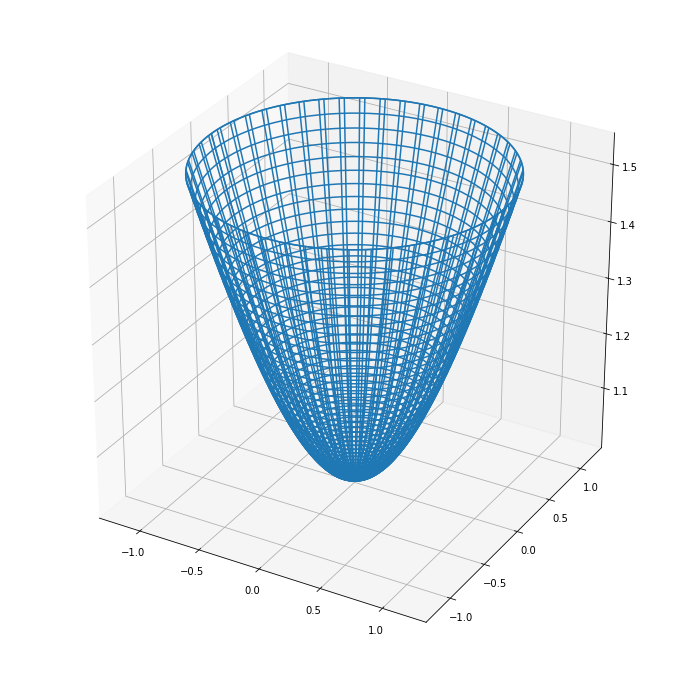

In [7]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection="3d")
ax.plot_wireframe(x0, x1, x2)

In [8]:
def project_mesh_to_klein(mesh_list):
    '''
        Project hyperboloid points to Beltrami-Klein ball
        Input:
            mesh_list: list of meshes. Assumed last mesh is 'time-like' component
        Output:
            list of meshes in Beltrami-Klein coordinates
    '''
    t = mesh_list[-1]
    new_meshes = []
    for mesh in mesh_list:
        mesh = mesh/t
        new_meshes.append(mesh)
    
    return new_meshes

In [9]:
alpha = np.linspace(-1., 1., 100)
theta = np.linspace(-np.pi, np.pi, 100)
alpha_mesh, theta_mesh = np.meshgrid(alpha, theta)
x0 = np.sinh(alpha_mesh)*np.cos(theta_mesh)
x1 = np.sinh(alpha_mesh)*np.sin(theta_mesh)
x2 = np.cosh(alpha_mesh)
klein_pts = project_mesh_to_klein([x0, x1, x2])

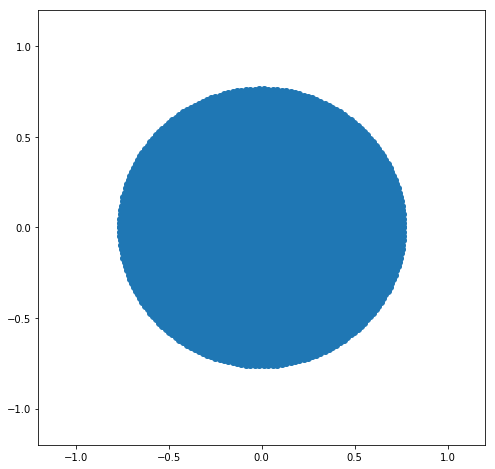

In [10]:
fig = plt.figure(figsize=(8,8))
ax = plt.gca(xlim=[-1.2, 1.2], ylim=[-1.2, 1.2])
plt.scatter(klein_pts[0], klein_pts[1])

### Projection from Klein model to Hyperboloid
$$\pi_{\mathbb{K}\to\mathbb{H}}(x)=\frac{1}{\sqrt{1-\|x\|^2}}(x, 1)$$

In [11]:
def project_mesh_from_klein(mesh_list):
    '''
        Project Beltrami-Klein ball points to hyperboloid
        Input:
            mesh_list: list of meshes. 
        Output:
            list of meshes in hyperboloid coordinates
    '''
    print("meshes =", mesh_list)
    new_meshes = []
    squares = np.zeros(mesh_list[0].shape)
    for mesh in mesh_list[:-1]:
        squares += mesh**2
    print("squares =", squares)
    coeff = 1./np.sqrt(1.-squares)
    
    for mesh in mesh_list:
        mesh = coeff*mesh
        new_meshes.append(mesh)
    
    #new_meshes.append(coeff)
    
    return new_meshes

In [12]:
hype_pts = project_mesh_from_klein(klein_pts)

meshes = [array([[ 0.76159416,  0.75297844,  0.74409659, ..., -0.74409659,
        -0.75297844, -0.76159416],
       [ 0.76006082,  0.75146245,  0.74259848, ..., -0.74259848,
        -0.75146245, -0.76006082],
       [ 0.75546699,  0.74692059,  0.73811019, ..., -0.73811019,
        -0.74692059, -0.75546699],
       ...,
       [ 0.75546699,  0.74692059,  0.73811019, ..., -0.73811019,
        -0.74692059, -0.75546699],
       [ 0.76006082,  0.75146245,  0.74259848, ..., -0.74259848,
        -0.75146245, -0.76006082],
       [ 0.76159416,  0.75297844,  0.74409659, ..., -0.74409659,
        -0.75297844, -0.76159416]]), array([[ 9.32683845e-17,  9.22132635e-17,  9.11255507e-17, ...,
        -9.11255507e-17, -9.22132635e-17, -9.32683845e-17],
       [ 4.83032866e-02,  4.77568440e-02,  4.71935224e-02, ...,
        -4.71935224e-02, -4.77568440e-02, -4.83032866e-02],
       [ 9.64120728e-02,  9.53213880e-02,  9.41970130e-02, ...,
        -9.41970130e-02, -9.53213880e-02, -9.64120728e-02],
    

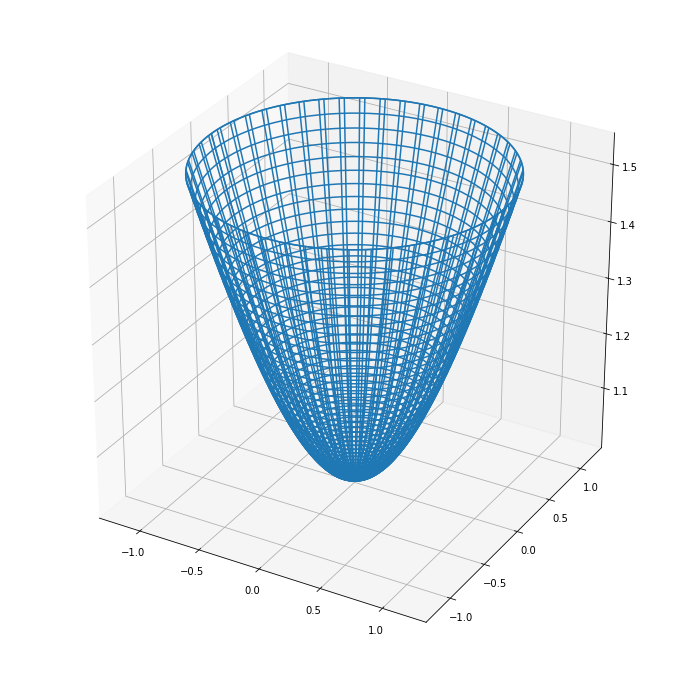

In [13]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection="3d")
ax.plot_wireframe(hype_pts[0], hype_pts[1], hype_pts[2])

## Frechet mean

In [14]:
from geometry import *
from optimiser import frechet_diff, gradient_descent

In [15]:
def frechet_diff_vectorised(p_eval, points, geometry="spherical"):
    '''
        Calculates the differential to enable a gradient descent algorithm to find 
        the Karcher/Fréchet mean of a set of points.
        Inputs:
            p_eval: Point at which to evaluate the derivative (usually a guess at 
                    the mean). (d+1)-dimensional vector, expressed in ambient space
                    coordinates.
            points: List of points which the derivative is calculate w.r.t. to. 
                    (d+1)-dimensional vector, expressed in ambient space
                    coordinates.
            geometry: string specifying which metric and distance function to use.
        Outputs:
            Derivative: (d+1)-dimensional vector, expressed in ambient space
                        coordinates.
        Note: should vectorise to remove loop over points.
    '''
    metric = get_metric(p_eval.shape[0], geometry)
    coeffs = -2.*distance(p_eval, points, geometry)
    print("numerator = ",coeffs)
    if geometry == "spherical":
        coeffs /= np.sqrt(1.-dot(p_eval, points, geometry)**2)+ 1.e-10
    elif geometry == "hyperbolic":
        coeffs /= np.sqrt(dot(p_eval, points, geometry)**2-1.)+ 1.e-10
    print("coeffs =",coeffs)
    print("points =", points)
    print("coeffs*points = ", coeffs*points)
    return np.atleast_2d(np.sum(coeffs*points, axis=1)).T


In [16]:
alpha = 0.1
beta = 1.1
a = np.array([[np.sinh(alpha), np.cosh(alpha)]]).T
b = np.array([[np.sinh(beta), np.cosh(beta)]]).T
p_initial = np.array([[np.sinh(2.5), np.cosh(2.5)]]).T
print(a, b, p_initial)
print(a.shape, b.shape, p_initial.shape)
points = np.hstack([a,b])
print(points.shape)
frechet_diff_vectorised(p_initial, points, geometry="hyperbolic")

[[0.10016675]
 [1.00500417]] [[1.33564747]
 [1.66851855]] [[6.05020448]
 [6.13228948]]
(2, 1) (2, 1) (2, 1)
(2, 2)
numerator =  [[-4.8 -2.8]]
coeffs = [[-0.87811905 -1.4703554 ]]
points = [[0.10016675 1.33564747]
 [1.00500417 1.66851855]]
coeffs*points =  [[-0.08795833 -1.96387647]
 [-0.8825133  -2.45331527]]


array([[-2.0518348 ],
       [-3.33582857]])

In [17]:
updated_pts = [p_initial]
steps = []
projections = []
#learning_rates = np.arange(1., )
for i in range(1,10):
    updated_pt, step, projection = gradient_descent(
                             updated_pts[i-1], 
                             points, 
                             frechet_diff_vectorised, 
                             geometry="hyperbolic", 
                             learning_rate=0.32,
                             return_vectors=True,
                        )
    print(updated_pt)
    updated_pts.append(updated_pt)
    steps.append(step)
    projections.append(projection)
print("updated_pts = ", updated_pts)
print("steps = ", steps)
print("projections = ", projections)

numerator =  [[-4.8 -2.8]]
coeffs = [[-0.87811905 -1.4703554 ]]
points = [[0.10016675 1.33564747]
 [1.00500417 1.66851855]]
coeffs*points =  [[-0.08795833 -1.96387647]
 [-0.8825133  -2.45331527]]
gradient_descent: step = [[-2.0518348 ]
 [-3.33582857]]
gradient_descent: projection on tangent space =  [[46.60540004]
 [45.98155405]]
[[0.06805242]
 [1.00231289]]
numerator =  [[-0.064 -2.064]]
coeffs = [[-1.9996587  -1.68463673]]
points = [[0.10016675 1.33564747]
 [1.00500417 1.66851855]]
coeffs*points =  [[-0.20029931 -2.25008079]
 [-2.00966533 -2.81084764]]
gradient_descent: step = [[-2.4503801 ]
 [-4.82051297]]
gradient_descent: projection on tangent space =  [[-2.13292183]
 [-0.14481554]]
[[0.82097071]
 [1.29382878]]
numerator =  [[-1.29792 -0.70208]]
coeffs = [[-1.86622093 -1.9595066 ]]
points = [[0.10016675 1.33564747]
 [1.00500417 1.66851855]]
coeffs*points =  [[-0.18693329 -2.61721004]
 [-1.87555981 -3.26947313]]
gradient_descent: step = [[-2.80414332]
 [-5.14503294]]
gradient_desce

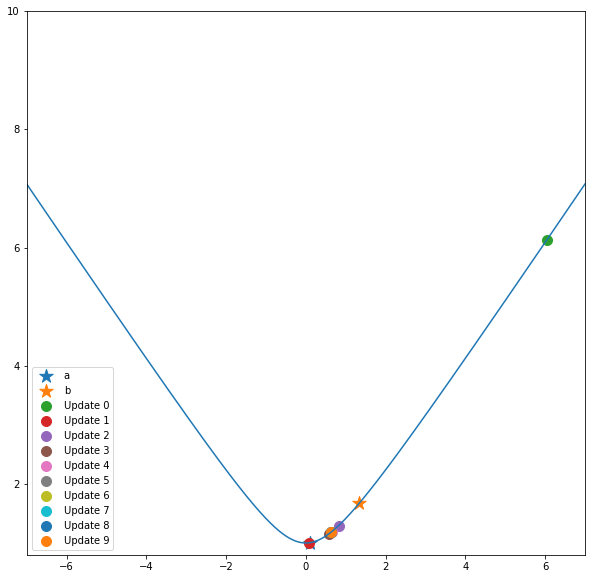

In [18]:
fig = plt.figure(figsize=(10,10))
ax = plt.gca(xlim=[-7, 7], ylim=[0.8,10.])
alpha = np.linspace(-np.pi, np.pi, 1000)
plt.plot(np.sinh(alpha), np.cosh(alpha)) 
ax.scatter(points[0][0], points[1][0], marker='*',s=200,label = "a")
ax.scatter(points[0][1], points[1][1], marker='*',s=200,label = "b")
for i, pt in enumerate(updated_pts):
#for i, pt in enumerate([]):
    ax.scatter(
                pt[0], pt[1], 
                marker=markers.MarkerStyle('o',fillstyle="none"), 
                s=100, label="Update {}".format(i)
              )

ax.legend()

## Einstein midpoint
$$ m_{uv} = \frac{\gamma_uu+\gamma_vv}{\gamma_u+\gamma_u} $$ where $\gamma_v = \frac{1}{\sqrt{1-\|v\|^2}}$

In [19]:
print("hyperboloid pts =", a, b)
print(a.shape, a.reshape([1, -1]).shape)
k_a = project_to_klein(a.reshape([1,-1]))
k_b = project_to_klein(b.reshape([1,-1]))
print("Beltrami-Klein pts = ", k_a, k_b)
gamma_a = 1./np.sqrt(1-np.linalg.norm(k_a[:-1])**2)
gamma_b = 1./np.sqrt(1-np.linalg.norm(k_b[:-1])**2)
print("gammas =", gamma_a, gamma_b)
midpoint = (gamma_a*k_a+gamma_b*k_b)/(gamma_a+gamma_b)
print(midpoint)

hyperboloid pts = [[0.10016675]
 [1.00500417]] [[1.33564747]
 [1.66851855]]
(2, 1) (1, 2)
Beltrami-Klein pts =  [[0.09966799 1.        ]] [[0.80049902 1.        ]]
gammas = 1.0 1.0
[[0.45008351 1.        ]]


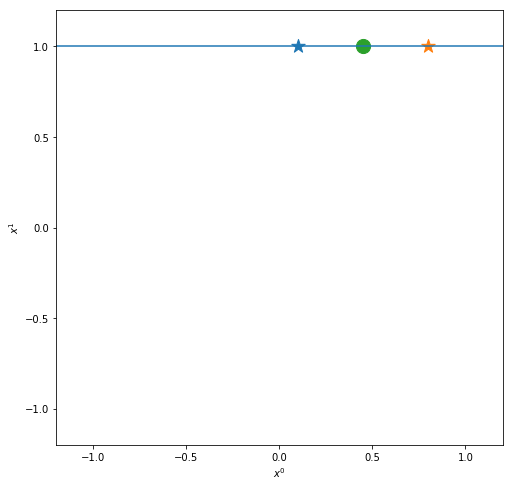

In [20]:
fig = plt.figure(figsize=(8,8))
ax = plt.gca(xlim=[-1.2, 1.2], ylim=[-1.2,1.2], xlabel="$x^0$", ylabel="$x^1$")
#circle = patches.Circle((0,0), 1., edgecolor="k", fill=False)
#ax.add_artist(circle)
ax.axhline(1., -1., 1.)
ax.scatter(k_a[0, 0], k_a[0, 1], marker='*',s=200,label = "a")
ax.scatter(k_b[0, 0], k_b[0, 1], marker='*',s=200,label = "b")

ax.scatter(midpoint[0, 0], midpoint[0, 1], marker='o',s=200,
           label = "Einstein midpoint")

In [21]:
def project_to_klein2(v):
    '''
        Project hyperboloid points to Beltrami-Klein ball
        Input:
            v, a vector in ambient space coordinates, with nth dimension 'time-like'
        Output:
            a vector in Beltrami-Klein coordinates
    '''
    #print(v)
    return (v/v[-1, :])

In [22]:
print(a)
print(b)
k_a = project_to_klein2(a)
k_b = project_to_klein2(b)
print(k_a)
print(k_b)

[[0.10016675]
 [1.00500417]]
[[1.33564747]
 [1.66851855]]
[[0.09966799]
 [1.        ]]
[[0.80049902]
 [1.        ]]


In [23]:
def project_from_klein(v):
    '''
        Project Beltrami-Klein ball points to hyperboloid
        Input:
            v, a vector in ambient space coordinates, with nth dimension = 1
        Output:
            a vector in hyperboloid coordinates
    '''
    if type(v) != np.ndarray:
        v = np.array(v)
    coeff = 1./np.sqrt(1-v[:-1,:]**2)

    return coeff*v

In [24]:
print(project_from_klein(k_a))
print(project_from_klein(k_b))

[[0.10016675]
 [1.00500417]]
[[1.33564747]
 [1.66851855]]


In [25]:
print(updated_pts)
print(np.hstack(updated_pts))
k_frech = project_to_klein2(np.hstack(updated_pts))

[array([[6.05020448],
       [6.13228948]]), array([[0.06805242],
       [1.00231289]]), array([[0.82097071],
       [1.29382878]]), array([[0.58774876],
       [1.15993474]]), array([[0.65054173],
       [1.19298136]]), array([[0.63278054],
       [1.18338971]]), array([[0.63773925],
       [1.18604863]]), array([[0.63634969],
       [1.18530204]]), array([[0.63673868],
       [1.18551092]]), array([[0.63662976],
       [1.18545242]])]
[[6.05020448 0.06805242 0.82097071 0.58774876 0.65054173 0.63278054
  0.63773925 0.63634969 0.63673868 0.63662976]
 [6.13228948 1.00231289 1.29382878 1.15993474 1.19298136 1.18338971
  1.18604863 1.18530204 1.18551092 1.18545242]]


In [26]:
theta = 2 * np.pi * np.random.rand(10)
print(type(theta))
colors = np.linspace(0., 1., k_frech.shape[1])
print(type(colors))
print(colors)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]


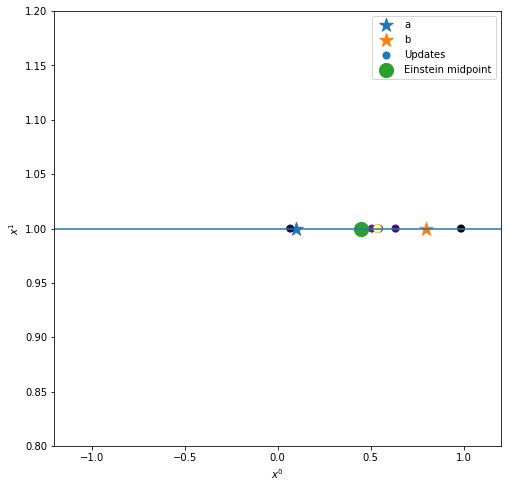

In [27]:
fig = plt.figure(figsize=(8,8))
ax = plt.gca(xlim=[-1.2, 1.2], ylim=[0.8,1.2], xlabel="$x^0$", ylabel="$x^1$")
#circle = patches.Circle((0,0), 1., edgecolor="k", fill=False)
#ax.add_artist(circle)
ax.axhline(1., -1., 1.)
ax.scatter(k_a[0], k_a[1], marker='*',s=200,label = "a")
ax.scatter(k_b[0], k_b[1], marker='*',s=200,label = "b")

#for i, pt in enumerate(k_frech):    
ax.scatter(
                k_frech[0, :], k_frech[1, :], 
                marker=markers.MarkerStyle('o',fillstyle="none"), 
                s=50, label="Updates",
                c=colors, cmap='inferno',
              )
ax.scatter(midpoint[0, 0], midpoint[0, 1], marker='o',s=200,
           label = "Einstein midpoint")
ax.legend()

(2, 10)


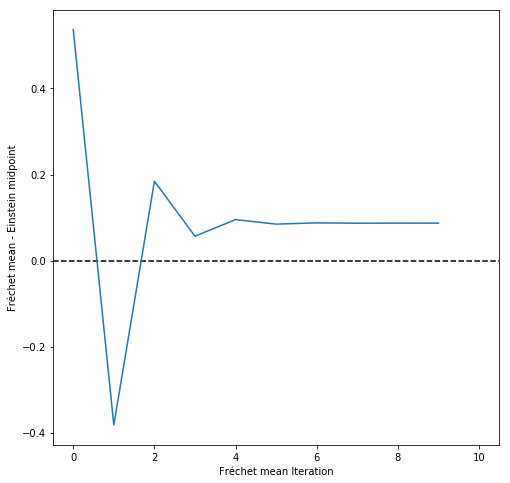

In [28]:
fig = plt.figure(figsize=(8,8))
ax = plt.gca(xlim=[-0.5, k_frech.shape[1]+0.5], 
             xlabel="Fréchet mean Iteration",
             ylabel="Fréchet mean - Einstein midpoint", 
            )
ax.axhline(0., linestyle="--", color='k')

#k_frech[:,0] - midpoint[0,0]
print(k_frech.shape)
ax.plot(range(k_frech.shape[1]), k_frech[0,:] - midpoint[0,0])

In [29]:
def project_to_klein2(v):
    '''
        Project hyperboloid points to Beltrami-Klein ball
        Input:
            v, a vector in ambient space coordinates, with nth dimension 'time-like'
        Output:
            a vector in Beltrami-Klein coordinates
    '''
    #print(v)
    return (v/v[-1, :])

Compare multiple points: is the Einstein midpoint always smaller than the Frechet mean?

In [30]:
def einstein_midpoint(points):
    klein_pts = project_to_klein2(points)
#    print("Klein points = ")
#    print(klein_pts)
    gammas = 1./np.sqrt(1-np.sum(klein_pts[:-1,:]**2, axis=0))
#    print("gammas = ")
#    print(gammas)
#    print("gammas*klein_pts =", gammas*klein_pts)
#    print("np.sum(gammas*klein_pts, axis=1) =", np.sum(gammas*klein_pts, axis=1))
#    print("np.sum(gammas) =", np.sum(gammas))
    klein_ein_midpt = np.atleast_2d(
                        np.sum(gammas*klein_pts, axis=1)
                     ).T/np.sum(gammas)
    return project_from_klein(klein_ein_midpt)

In [31]:
def frechet_mean(points):
    updated_pt = np.array([0., 1.]).reshape(-1, 1)
    print(updated_pt)
    for i in range(1,6):
        old_pt = updated_pt
        updated_pt = gradient_descent(
                             old_pt, 
                             points, 
                             frechet_diff_vectorised, 
                             geometry="hyperbolic", 
                             learning_rate=0.32,
                             return_vectors=False,
                        )
        if(distance(updated_pt, old_pt, 
                    geometry="hyperbolic") < 1e-5):
            break
    return updated_pt

Problem with Fréchet mean when test point is equal to one of the data points: dot-product is -1, so $\sqrt{<x_i, x_i>^2 - 1} = 0$

In [32]:
angles = np.linspace(-2, 2, 7)
print(angles)
labels = []
labels_flat = []
einstein_midpts = []
frechet_means = []
for i, angle in enumerate(angles):
    print(i)
    a = np.array([np.sinh(angle), np.cosh(angle)]).reshape(-1, 1)
    print("a", a)
    for angle2 in angles[i+1:]:
        b = np.array([np.sinh(angle2), np.cosh(angle2)]).reshape(-1, 1)
        print("b", b)
        with np.printoptions(precision=1):
            labels.append("{}\n{}".format(a.squeeze(), b.squeeze()))
            labels_flat.append("{}-{}".format(a.squeeze(), b.squeeze()))
        einstein_midpt = einstein_midpoint(np.hstack([a, b]))
        einstein_midpts.append(einstein_midpt)
        print("Einstein midpoint = {}".format(einstein_midpt))
        frechet_means.append(frechet_mean(np.hstack([a, b])))
        print("Frechet mean = {}".format(frechet_means[-1]))
        print("-"*70)
    print("="*70)

[-2.         -1.33333333 -0.66666667  0.          0.66666667  1.33333333
  2.        ]
0
a [[-3.62686041]
 [ 3.76219569]]
b [[-1.76503538]
 [ 2.02863252]]
Einstein midpoint = [[-2.55280722]
 [ 2.74168283]]
[[0.]
 [1.]]
numerator =  [[-4.         -2.66666667]]
coeffs = [[-1.10288226 -1.51082902]]
points = [[-3.62686041 -1.76503538]
 [ 3.76219569  2.02863252]]
coeffs*points =  [[ 4.          2.66666667]
 [-4.14925888 -3.06491687]]
gradient_descent: step = [[ 6.66666667]
 [-7.21417575]]
gradient_descent: projection on tangent space =  [[6.66666667]
 [0.        ]]
numerator =  [[-0.26666667 -1.6       ]]
coeffs = [[-1.99408634 -1.80158678]]
points = [[-3.62686041 -1.76503538]
 [ 3.76219569  2.02863252]]
coeffs*points =  [[ 7.2322728   3.17986441]
 [-7.50214304 -3.65475753]]
gradient_descent: step = [[ 10.41213721]
 [-11.15690057]]
gradient_descent: projection on tangent space =  [[-7.99064466]
 [ 7.76955325]]
numerator =  [[-0.928      -0.40533333]]
coeffs = [[-1.92999722 -1.98637406]]
poi

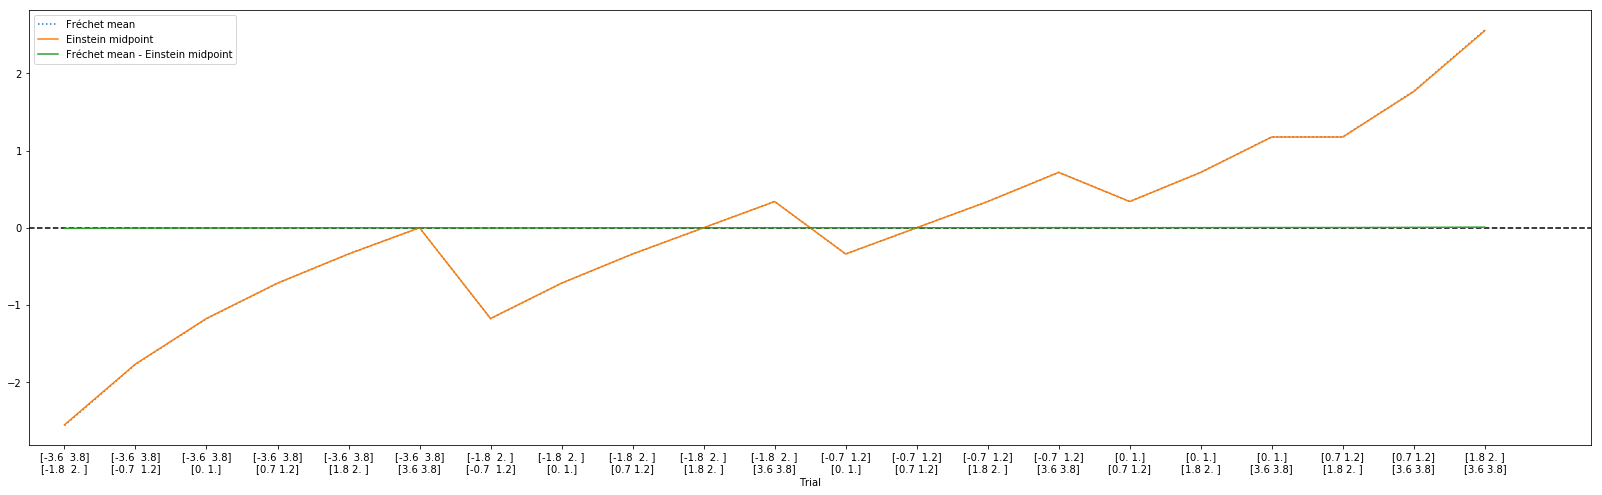

In [33]:
fig = plt.figure(figsize=(28,8))
ax = plt.gca(xlim=[-0.5, len(einstein_midpts)+0.5], 
             xlabel="Trial",
             ylabel="", 
            )
ax.axhline(0., linestyle="--", color='k')

#print(np.array(frechet_means))

ax.plot(labels, 
        np.array(frechet_means)[:,0,:],
        color="tab:blue", label="Fréchet mean", linestyle=':',
       )

ax.plot(labels, 
        np.array(einstein_midpts)[:,0,:],
        color="tab:orange", label="Einstein midpoint", linestyle='-',
       )
ax.plot(labels, 
        np.array(frechet_means)[:,0,:] - np.array(einstein_midpts)[:,0,:],
        color="tab:green", label="Fréchet mean - Einstein midpoint"
       )
ax.legend()

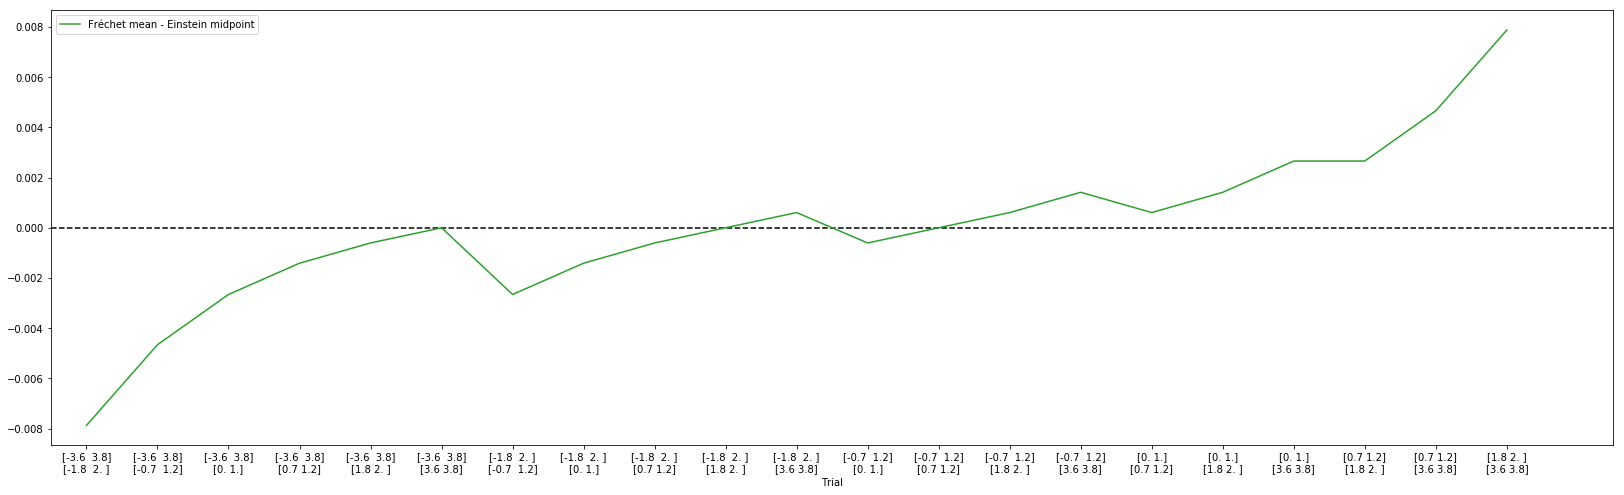

In [34]:
fig = plt.figure(figsize=(28,8))
ax = plt.gca(xlim=[-0.5, len(einstein_midpts)+0.5], 
             xlabel="Trial",
             ylabel="", 
            )
ax.axhline(0., linestyle="--", color='k')

ax.plot(labels, 
        np.array(frechet_means)[:,0,:] - np.array(einstein_midpts)[:,0,:],
        color="tab:green", label="Fréchet mean - Einstein midpoint"
       )
ax.legend()

In [35]:
for i, ein in enumerate(einstein_midpts):
    print("Points: Einstein, Frechet")
    with np.printoptions(precision=2):
        print("{}: {} {}".format(labels_flat[i], ein.T, frechet_means[i].T))

Points: Einstein, Frechet
[-3.6  3.8]-[-1.8  2. ]: [[-2.55  2.74]] [[-2.56  2.75]]
Points: Einstein, Frechet
[-3.6  3.8]-[-0.7  1.2]: [[-1.77  2.03]] [[-1.77  2.03]]
Points: Einstein, Frechet
[-3.6  3.8]-[0. 1.]: [[-1.18  1.54]] [[-1.18  1.55]]
Points: Einstein, Frechet
[-3.6  3.8]-[0.7 1.2]: [[-0.72  1.23]] [[-0.72  1.23]]
Points: Einstein, Frechet
[-3.6  3.8]-[1.8 2. ]: [[-0.34  1.06]] [[-0.34  1.06]]
Points: Einstein, Frechet
[-3.6  3.8]-[3.6 3.8]: [[0. 1.]] [[0. 1.]]
Points: Einstein, Frechet
[-1.8  2. ]-[-0.7  1.2]: [[-1.18  1.54]] [[-1.18  1.55]]
Points: Einstein, Frechet
[-1.8  2. ]-[0. 1.]: [[-0.72  1.23]] [[-0.72  1.23]]
Points: Einstein, Frechet
[-1.8  2. ]-[0.7 1.2]: [[-0.34  1.06]] [[-0.34  1.06]]
Points: Einstein, Frechet
[-1.8  2. ]-[1.8 2. ]: [[-1.09e-16  1.00e+00]] [[0. 1.]]
Points: Einstein, Frechet
[-1.8  2. ]-[3.6 3.8]: [[0.34 1.06]] [[0.34 1.06]]
Points: Einstein, Frechet
[-0.7  1.2]-[0. 1.]: [[-0.34  1.06]] [[-0.34  1.06]]
Points: Einstein, Frechet
[-0.7  1.2]-[0.7

### Multiple dimensions comparison

Compare Fréchet mean to Einstein midpoint.


In [36]:
angles = np.random.uniform(-np.pi, np.pi, 5)
pts = []
for angle in angles:
    pts.append(np.array([np.sinh(angle), np.cosh(angle)]).reshape(-1, 1))
pts = np.hstack(pts)
einst = einstein_midpoint(pts)
frech = frechet_mean(pts)
print(einst)
print(frech)

[[0.]
 [1.]]
numerator =  [[-4.77292275 -1.32026243 -0.23313219 -5.36683109 -1.13215984]]
coeffs = [[-0.88526897 -1.86180237 -1.99547795 -0.73686476 -1.89704721]]
points = [[ 5.39149446  0.70913135 -0.11683025 -7.28333257 -0.59680109]
 [ 5.48344896  1.22591487  1.00680152  7.35166194  1.16454778]]
coeffs*points =  [[-4.77292275 -1.32026243  0.23313219  5.36683109  1.13215984]
 [-4.85432721 -2.28241121 -2.00905024 -5.4171806  -2.20920212]]
gradient_descent: step = [[  0.63893794]
 [-16.77217139]]
gradient_descent: projection on tangent space =  [[0.63893794]
 [0.        ]]
numerator =  [[-5.18184303 -1.72918272 -0.17578809 -4.95791081 -0.72323956]]
coeffs = [[-0.78115627 -1.77096681 -1.9974272  -0.83713379 -1.95706635]]
points = [[ 5.39149446  0.70913135 -0.11683025 -7.28333257 -0.59680109]
 [ 5.48344896  1.22591487  1.00680152  7.35166194  1.16454778]]
coeffs*points =  [[-4.21159969 -1.25584809  0.23335992  6.09712381  1.16797933]
 [-4.28343052 -2.17105455 -2.01101274 -6.15432463 -2.27

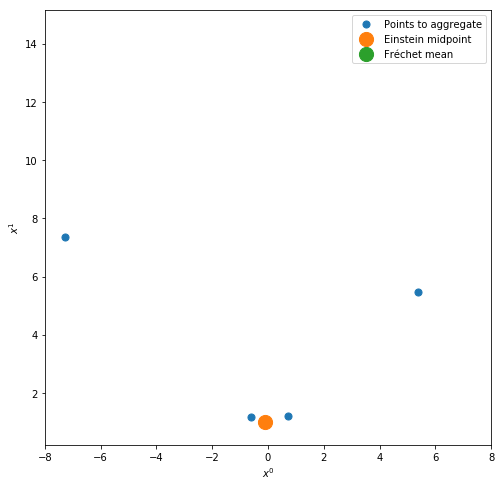

In [37]:
fig = plt.figure(figsize=(8,8))
ax = plt.gca(xlim=[-8, 8], xlabel="$x^0$", ylabel="$x^1$")
#circle = patches.Circle((0,0), 1., edgecolor="k", fill=False)
#ax.add_artist(circle)
#for i, pt in enumerate(k_frech):    
ax.scatter(
                pts[0, :], pts[1, :], 
                marker=markers.MarkerStyle('o',fillstyle="none"), 
                s=50, label="Points to aggregate",
               # c=colors, cmap='inferno',
              )
ax.scatter(einst[0], einst[1], marker='o',s=200,
           label = "Einstein midpoint")
ax.scatter(frech[0], frech[1], marker='o',s=200,
           label = "Fréchet mean")
ax.legend()

In [92]:
def einstein_midpoint_einsum(points):
    klein_pts = project_to_klein2(points)
    print(klein_pts.shape)
    gammas = 1./np.sqrt(1-np.einsum("ij,ij->j", klein_pts[:-1,:], klein_pts[:-1,:]))
    print(gammas.shape)
    klein_ein_midpt = np.einsum("i,ji->j", gammas, klein_pts).reshape([-1, 1])/np.sum(gammas)
    print(klein_ein_midpt.shape)
#    klein_ein_midpt = np.atleast_2d(
#                        np.sum(gammas*klein_pts, axis=1)
#                     ).T/np.sum(gammas)
    return project_from_klein(klein_ein_midpt)

In [93]:
einst_1 = einstein_midpoint(pts)
einst_2 = einstein_midpoint_einsum(pts)

(2, 5)
(5,)
(2, 1)


In [94]:
print(einst_1)
print(einst_2)

[[-0.1176299 ]
 [ 1.00689463]]
[[-0.1176299 ]
 [ 1.00689463]]


In [55]:
a = np.arange(4).reshape([2,2])
print(a)

[[0 1]
 [2 3]]


In [66]:
gamma = np.einsum("ij,ij->j", a, a)
print(gamma)

[ 4 10]


In [75]:
pp = np.ones([2,2])
print(pp)

[[1. 1.]
 [1. 1.]]


In [78]:
np.einsum("j,ij->ij", gamma, pp)

array([[ 4., 10.],
       [ 4., 10.]])

In [96]:
print(np.einsum("i->", gamma),"vs",np.sum(gamma))

14 vs 14
